In [203]:
from platypus import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import scipy.linalg
import plotly
import plotly.graph_objs as go
plotly.__version__
import plotly.plotly as py

In [210]:
def fun(vars):
    X = [0.1335, 0.2611, 0.3964]
    x0 = [0.4277, 0.5523, 0.3974]
    a11,a12,a13 = vars[0:3]
    a21,a22,a23 = vars[3:6]
    a31,a32,a33 = vars[6:9]
    y1 = a11*X[0] + a12*X[1] + a13*X[2]
    y2 = a21*X[0] + a22*X[1] + a23*X[2]
    y3 = a31*X[0] + a32*X[1] + a33*X[2]
    return [y1-x0[0], y2-x0[1], y3-x0[2]], [a11+a21+a31-1, a12+a22+a32-1, a13+a23+a33-1, 0.13-a31, 0.26-a21, 0.36-a13]

problem = Problem(9, 3, 6)
problem.types[:] = Real(0, 1)
problem.constraints[:] = "<=0"
problem.function = fun

algorithms = [NSGAII, (NSGAIII, {"divisions_outer":24}), GDE3, (MOEAD, {"weight_generator":normal_boundary_weights, "divisions_outer":12}), SPEA2]

results = experiment(algorithms, problem, seeds=1, nfe=500)
results_min = results
results_max = experiment(algorithms, problem, seeds=1, nfe=2000)

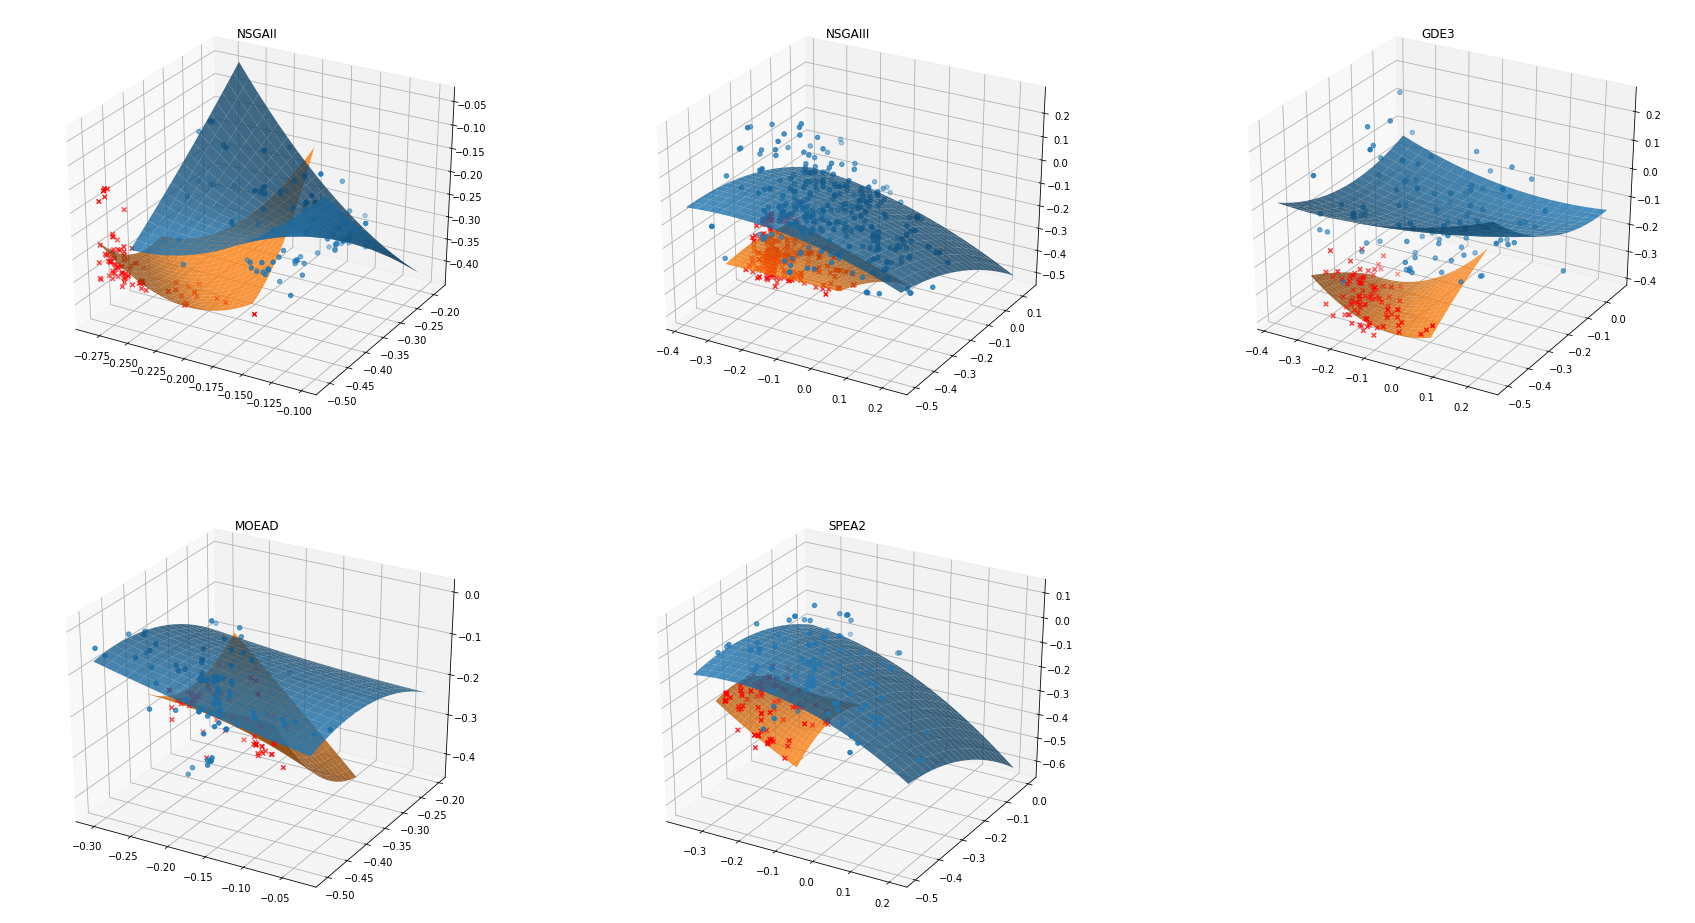

In [273]:
fig = plt.figure(figsize=(30, 80))

for i, algorithm in enumerate(six.iterkeys(results)):
    result = results_min[algorithm]["Problem"][0]
    result_m = results_max[algorithm]["Problem"][0]
    ax = fig.add_subplot(9, 3, i+1, projection='3d')
    x = [s.objectives[0] for s in result]
    y = [s.objectives[1] for s in result]
    z = [s.objectives[2] for s in result]
    data = np.c_[x,y,z]
    x_m = [s.objectives[0] for s in result_m]
    y_m = [s.objectives[1] for s in result_m]
    z_m = [s.objectives[2] for s in result_m]
    data_m = np.c_[x_m,y_m,z_m]
     
    mn = np.min(data, axis=0)
    mx = np.max(data, axis=0)
    X,Y = np.meshgrid(np.linspace(mn[0], mx[0], 20), np.linspace(mn[1], mx[1], 20))
    XX = X.flatten()
    YY = Y.flatten()
    
    A = np.c_[np.ones(data.shape[0]), data[:,:2], np.prod(data[:,:2], axis=1), data[:,:2]**2]
    C,_,_,_ = scipy.linalg.lstsq(A, data[:,2])
    Z = np.dot(np.c_[np.ones(XX.shape), XX, YY, XX*YY, XX**2, YY**2], C).reshape(X.shape)
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.8)

    mn = np.min(data_m, axis=0)
    mx = np.max(data_m, axis=0)
    X,Y = np.meshgrid(np.linspace(mn[0], mx[0], 20), np.linspace(mn[1], mx[1], 20))
    XX = X.flatten()
    YY = Y.flatten()

    A = np.c_[np.ones(data_m.shape[0]), data_m[:,:2], np.prod(data_m[:,:2], axis=1), data_m[:,:2]**2]
    C,_,_,_ = scipy.linalg.lstsq(A, data_m[:,2])

    Z = np.dot(np.c_[np.ones(XX.shape), XX, YY, XX*YY, XX**2, YY**2], C).reshape(X.shape)

    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.8)    
    
    ax.scatter(x, y, z)
    ax.scatter(x_m, y_m, z_m, marker='x', c ='r')
    ax.axis('equal')
    ax.axis('tight')
    ax.set_title(algorithm)

plt.show()

In [4]:
hyp = Hypervolume(minimum=[-1, -1, -1], maximum=[1, 1, 1])
hyp_result = calculate(results, hyp)
display(hyp_result, ndigits=4)

NSGAII
    Problem
        Hypervolume : [0.3303]
NSGAIII
    Problem
        Hypervolume : [0.3305]
GDE3
    Problem
        Hypervolume : [0.334]
MOEAD
    Problem
        Hypervolume : [0.3315]
SPEA2
    Problem
        Hypervolume : [0.3072]


In [5]:
sp = Spacing()
for problem in results:
    print(problem+': ', sp.calculate(results[problem]['Problem'][0]))

NSGAII:  0.04172271259362423
NSGAIII:  0.04944881379897171
GDE3:  0.08912559486092667
MOEAD:  0.05439077255762067
SPEA2:  0.08634093890163194


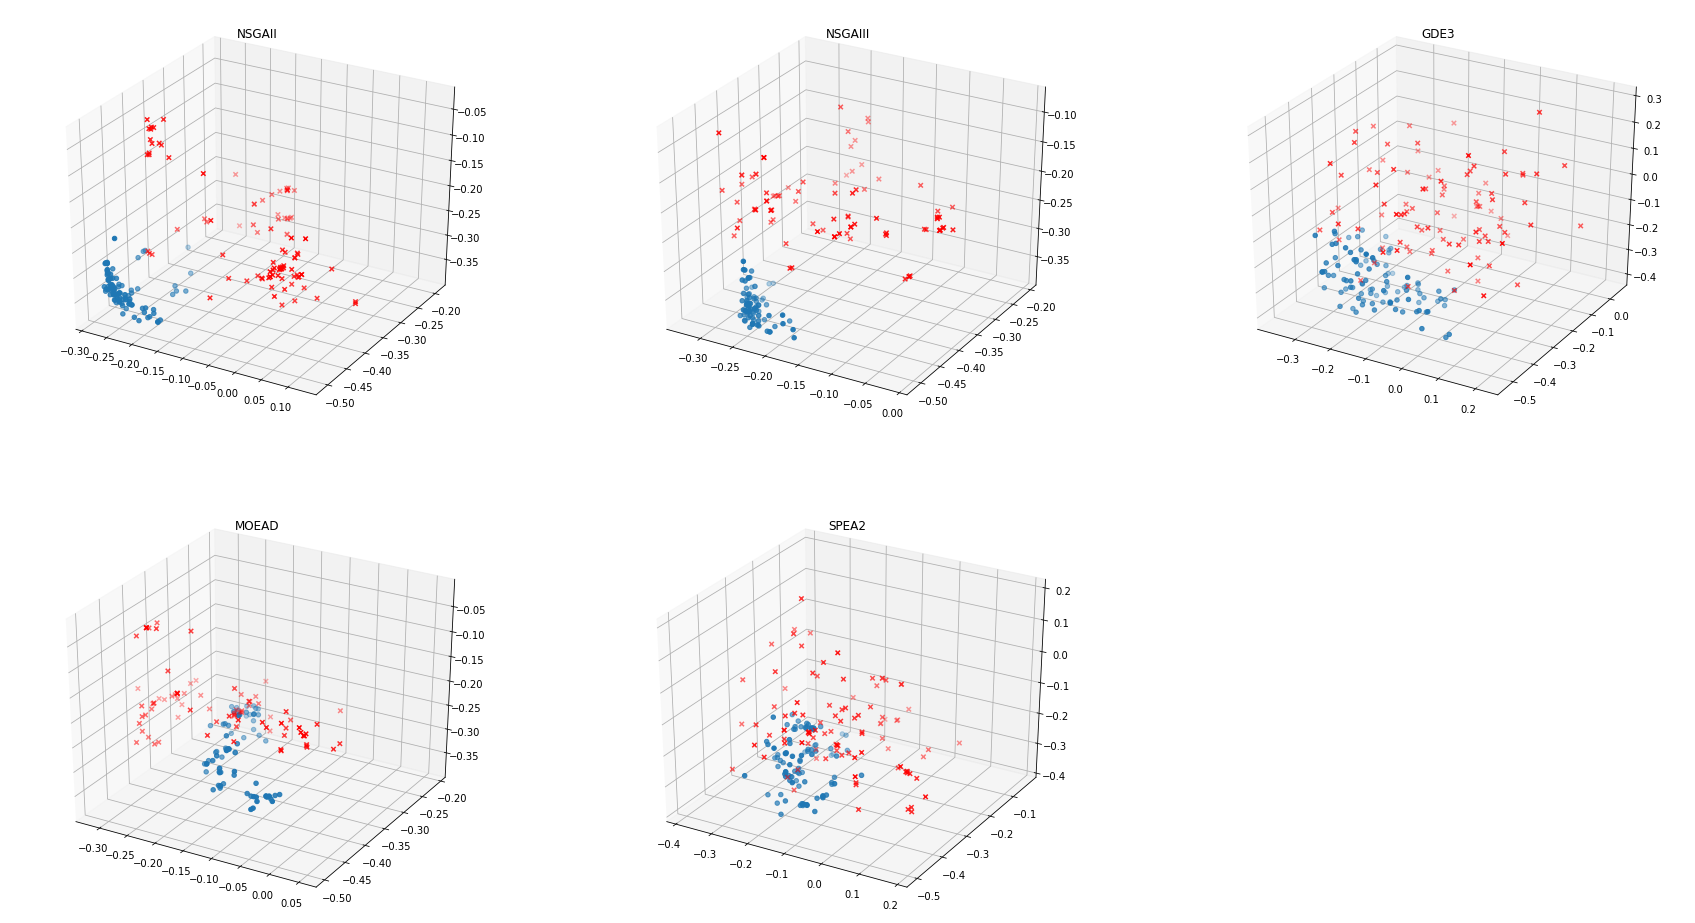

In [135]:
fig = plt.figure(figsize=(30, 80))

for i, algorithm in enumerate(six.iterkeys(results_min)):
    result = results_min[algorithm]["Problem"][0]
    result_m = results_max[algorithm]["Problem"][0]
    ax = fig.add_subplot(9, 3, i+1, projection='3d')
    ax.scatter([s.objectives[0] for s in result], [s.objectives[1] for s in result], [s.objectives[2] for s in result], marker='x', c ='r')
    ax.scatter([s.objectives[0] for s in result_m], [s.objectives[1] for s in result_m], [s.objectives[2] for s in result_m])
    ax.set_title(algorithm)
    
plt.show()

In [250]:
def fun1(vars):
    X = [0.1335, 0.2611, 0.3964]
    x0 = [0.4277, 0.5523, 0.3974]
    a11,a12,a13 = vars[0:3]
    a21,a22,a23 = vars[3:6]
    a31,a32,a33 = vars[6:9]
    y1 = a11*X[0] + a12*X[1] + a13*X[2]
    y2 = a21*X[0] + a22*X[1] + a23*X[2]
    y3 = a31*X[0] + a32*X[1] + a33*X[2]
    return [y1-x0[0], y2-x0[1], y3-x0[2]], [a11+a21+a31-1, a12+a22+a32-1, a13+a23+a33-1, 0.13-a31, 0.26-a21, 0.36-a13]

def fun2(vars):
    X = [0.6013, 0.3857, 0.5201]
    x0 = [0.3506, 0.2022, 0.2038]
    a11,a12,a13 = vars[0:3]
    a21,a22,a23 = vars[3:6]
    a31,a32,a33 = vars[6:9]
    y1 = a11*X[0] + a12*X[1] + a13*X[2]
    y2 = a21*X[0] + a22*X[1] + a23*X[2]
    y3 = a31*X[0] + a32*X[1] + a33*X[2]
    return [y1-x0[0], y2-x0[1], y3-x0[2]], [a11+a21+a31-1, a12+a22+a32-1, a13+a23+a33-1, 0.13-a31, 0.26-a21, 0.36-a13]

algorithms = (NSGAIII, {"divisions_outer":12})

problem1 = Problem(9, 3, 6)
problem1.types[:] = Real(0, 1)
problem1.constraints[:] = "<=0"
problem1.function = fun1
results1 = experiment(algorithms, problem, seeds=1, nfe=2000)

problem2 = Problem(9, 3, 6)
problem2.types[:] = Real(0, 1)
problem2.constraints[:] = "<=0"
problem2.function = fun2
results2 = experiment(algorithms, problem, seeds=1, nfe=3000)

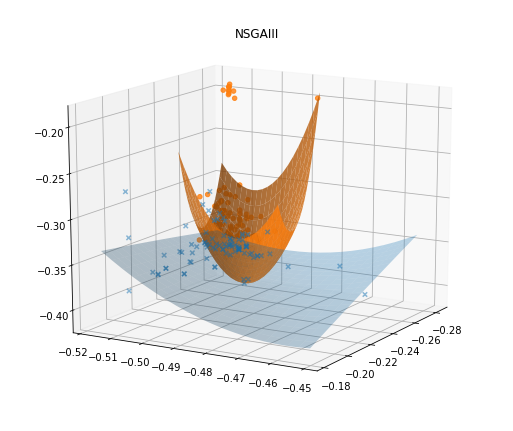

In [272]:
fig = plt.figure(figsize=(30, 80))

for i, algorithm in enumerate(six.iterkeys(results1)):
    result1 = results1[algorithm]["Problem"][0]
    result2 = results2[algorithm]["Problem"][0]
    ax = fig.add_subplot(9, 3, i+1, projection='3d')
    
    x = [s.objectives[0] for s in result1]
    y = [s.objectives[1] for s in result1]
    z = [s.objectives[2] for s in result1]
    data = np.c_[x,y,z]
    x_m = [s.objectives[0] for s in result2]
    y_m = [s.objectives[1] for s in result2]
    z_m = [s.objectives[2] for s in result2]
    data_m = np.c_[x_m,y_m,z_m]
    
    mn = np.min(data, axis=0)
    mx = np.max(data, axis=0)
    X,Y = np.meshgrid(np.linspace(mn[0], mx[0], 20), np.linspace(mn[1], mx[1], 20))
    XX = X.flatten()
    YY = Y.flatten()
    A = np.c_[np.ones(data.shape[0]), data[:,:2], np.prod(data[:,:2], axis=1), data[:,:2]**2]
    C,_,_,_ = scipy.linalg.lstsq(A, data[:,2])
    Z = np.dot(np.c_[np.ones(XX.shape), XX, YY, XX*YY, XX**2, YY**2], C).reshape(X.shape)
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.3)
    
    mn = np.min(data_m, axis=0)
    mx = np.max(data_m, axis=0)
    X,Y = np.meshgrid(np.linspace(mn[0], mx[0], 20), np.linspace(mn[1], mx[1], 20))
    XX = X.flatten()
    YY = Y.flatten()
    A = np.c_[np.ones(data_m.shape[0]), data_m[:,:2], np.prod(data_m[:,:2], axis=1), data_m[:,:2]**2]
    C,_,_,_ = scipy.linalg.lstsq(A, data_m[:,2])
    Z = np.dot(np.c_[np.ones(XX.shape), XX, YY, XX*YY, XX**2, YY**2], C).reshape(X.shape)
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.8)    
    
    ax.scatter(x, y, z, marker='x', alpha=0.5)
    ax.scatter(x_m, y_m, z_m, alpha=0.8)
    ax.axis('equal')
    ax.axis('tight')
    ax.set_title(algorithm)    
for angle in range(0, 360):
    ax.view_init(15, 30)
    plt.pause(.001)
plt.show()
